# Intorduction to notebook

This notebook is dedicated to the exploratory data analysis of the financial dataset. It will mostly focus on feature distribution among clients who have higher and lover risk of having problems repaying the loan - normal and risky clients. This notebook also prepares the dataset for machine learning task - training and deploying the model (Model 1). However, training and deploying will be executed in subsequent notebooks.

# Package import and settings

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import glob
import os

from scipy import stats
from scipy.stats import levene

%load_ext nb_black
%config InlineBackend.figure_format = 'svg'

<IPython.core.display.Javascript object>

In [2]:
df_application_train = pd.read_csv(
    "/Users/drkazimieras/Turing College/Home credit default risk/data files/application_train.csv"
)

<IPython.core.display.Javascript object>

# Overview

In [3]:
df_application_train.shape

(307511, 122)

<IPython.core.display.Javascript object>

The primary dataset is composed of 300 000 users and 122 features. 

In [4]:
pd.set_option("display.max_columns", None)

df_application_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

<IPython.core.display.Javascript object>

In [5]:
pd.reset_option("display.max_columns")

<IPython.core.display.Javascript object>

In [6]:
df_feature_names = df_application_train.columns

# "list" as a work around for truncation
print(list(df_feature_names))

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELE

<IPython.core.display.Javascript object>

In [7]:
pd.set_option("display.max_rows", None)

df = df_application_train

num_of_rows = len(df)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / num_of_rows) * 100

missing_percentage_df = pd.DataFrame(
    {
        "Missing values (count)": missing_values,
        "Missing values (%)": missing_percentage,
    }
).sort_values("Missing values (%)", ascending=False)

missing_percentage_df = missing_percentage_df[
    missing_percentage_df["Missing values (%)"] > 0
]

missing_percentage_df

Missing values (count)  Missing values (%)
COMMONAREA_MEDI                               214865           69.872297
COMMONAREA_AVG                                214865           69.872297
COMMONAREA_MODE                               214865           69.872297
NONLIVINGAPARTMENTS_MODE                      213514           69.432963
NONLIVINGAPARTMENTS_AVG                       213514           69.432963
NONLIVINGAPARTMENTS_MEDI                      213514           69.432963
FONDKAPREMONT_MODE                            210295           68.386172
LIVINGAPARTMENTS_MODE                         210199           68.354953
LIVINGAPARTMENTS_AVG                          210199           68.354953
LIVINGAPARTMENTS_MEDI                         210199           68.354953
FLOORSMIN_AVG                                 208642           67.848630
FLOORSMIN_MODE                                208642           67.848630
FLOORSMIN_MEDI                                208642           67.848630
YEARS_BUILD_MEDI                              204488           66.497784
YEARS_BUILD_MODE                              204488           66.497784
YEARS_BUILD_AVG                               204488           66.497784
OWN_CAR_AGE                                   202929           65.990810
LANDAREA_MEDI                                 182590           59.376738
LANDAREA_MODE                                 182590           59.376738
LANDAREA_AVG                                  182590           59.376738
BASEMENTAREA_MEDI                             179943           58.515956
BASEMENTAREA_AVG                              179943           58.515956
BASEMENTAREA_MODE                             179943           58.515956
EXT_SOURCE_1                                  173378           56.381073
NONLIVINGAREA_MODE                            169682           55.179164
NONLIVINGAREA_AVG                             169682           55.179164
NONLIVINGAREA_MEDI                            169682           55.179164
ELEVATORS_MEDI                                163891           53.295980
ELEVATORS_AVG                                 163891           53.295980
ELEVATORS_MODE                                163891           53.295980
WALLSMATERIAL_MODE                            156341           50.840783
APARTMENTS_MEDI                               156061           50.749729
APARTMENTS_AVG                                156061           50.749729
APARTMENTS_MODE                               156061           50.749729
ENTRANCES_MEDI                                154828           50.348768
ENTRANCES_AVG                                 154828           50.348768
ENTRANCES_MODE                                154828           50.348768
LIVINGAREA_AVG                                154350           50.193326
LIVINGAREA_MODE                               154350           50.193326
LIVINGAREA_MEDI                               154350           50.193326
HOUSETYPE_MODE                                154297           50.176091
FLOORSMAX_MODE                                153020           49.760822
FLOORSMAX_MEDI                                153020           49.760822
FLOORSMAX_AVG                                 153020           49.760822
YEARS_BEGINEXPLUATATION_MODE                  150007           48.781019
YEARS_BEGINEXPLUATATION_MEDI                  150007           48.781019
YEARS_BEGINEXPLUATATION_AVG                   150007           48.781019
TOTALAREA_MODE                                148431           48.268517
EMERGENCYSTATE_MODE                           145755           47.398304
OCCUPATION_TYPE                                96391           31.345545
EXT_SOURCE_3                                   60965           19.825307
AMT_REQ_CREDIT_BUREAU_HOUR                     41519           13.501631
AMT_REQ_CREDIT_BUREAU_DAY                      41519           13.501631
AMT_REQ_CREDIT_BUREAU_WEEK                     41519           13.501631
AMT_REQ_CREDIT_

<IPython.core.display.Javascript object>

In [8]:
pd.reset_option("display.max_rows")

<IPython.core.display.Javascript object>

In [9]:
missing_count = missing_percentage_df["Missing values (count)"].count()
missing_count

67

<IPython.core.display.Javascript object>

67 features have at least one missing values (ranging from 1 missing entry to almost 70% of total feature information).

Notes on missing values:
- Most of the missing values are related to the housing information (around 60% of various features related to housing), implying it may not be missing at random or/and it is missing altogether with many features. Housing information features encompass very detailed explanations about the place that the clients live in. This information takes some time to gather and may not be available immediately after filling the application.
- OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, ... features are related to the defaults on credit of clients’ social circle, this information may be not available prior to credit issuance.
- External sources related information may also be not available immediately.
- AMT_REQ_CREDIT_BUREAU_<...> is the information that may not be immediately accessible prior to issuance of application.

In [10]:
df_HomeCredit_columns_description = pd.read_csv(
    "/Users/drkazimieras/Turing College/Home credit default risk/data files/HomeCredit_columns_description.csv",
    encoding="ISO-8859-1",
)

<IPython.core.display.Javascript object>

In [11]:
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_row", None)

filter_descriptions = df_HomeCredit_columns_description[
    df_HomeCredit_columns_description["Table"].str.contains(
        "application_{train|test}.csv"
    )
]
filter_descriptions_clean = filter_descriptions.drop(["Unnamed: 0", "Table"], axis=1)
filter_descriptions_clean

Row  \
0                      SK_ID_CURR   
1                          TARGET   
2              NAME_CONTRACT_TYPE   
3                     CODE_GENDER   
4                    FLAG_OWN_CAR   
5                 FLAG_OWN_REALTY   
6                    CNT_CHILDREN   
7                AMT_INCOME_TOTAL   
8                      AMT_CREDIT   
9                     AMT_ANNUITY   
10                AMT_GOODS_PRICE   
11                NAME_TYPE_SUITE   
12               NAME_INCOME_TYPE   
13            NAME_EDUCATION_TYPE   
14             NAME_FAMILY_STATUS   
15              NAME_HOUSING_TYPE   
16     REGION_POPULATION_RELATIVE   
17                     DAYS_BIRTH   
18                  DAYS_EMPLOYED   
19              DAYS_REGISTRATION   
20                DAYS_ID_PUBLISH   
21                    OWN_CAR_AGE   
22                     FLAG_MOBIL   
23                 FLAG_EMP_PHONE   
24                FLAG_WORK_PHONE   
25               FLAG_CONT_MOBILE   
26                     FLAG_PHONE   
27                     FLAG_EMAIL   
28                OCCUPATION_TYPE   
29                CNT_FAM_MEMBERS   
30           REGION_RATING_CLIENT   
31    REGION_RATING_CLIENT_W_CITY   
32     WEEKDAY_APPR_PROCESS_START   
33        HOUR_APPR_PROCESS_START   
34     REG_REGION_NOT_LIVE_REGION   
35     REG_REGION_NOT_WORK_REGION   
36    LIVE_REGION_NOT_WORK_REGION   
37         REG_CITY_NOT_LIVE_CITY   
38         REG_CITY_NOT_WORK_CITY   
39        LIVE_CITY_NOT_WORK_CITY   
40              ORGANIZATION_TYPE   
41                   EXT_SOURCE_1   
42                   EXT_SOURCE_2   
43                   EXT_SOURCE_3   
44                 APARTMENTS_AVG   
45               BASEMENTAREA_AVG   
46    YEARS_BEGINEXPLUATATION_AVG   
47                YEARS_BUILD_AVG   
48                 COMMONAREA_AVG   
49                  ELEVATORS_AVG   
50                  ENTRANCES_AVG   
51                  FLOORSMAX_AVG   
52                  FLOORSMIN_AVG   
53                   LANDAREA_AVG   
54           LIVINGAPARTMENTS_AVG   
55                 LIVINGAREA_AVG   
56        NONLIVINGAPARTMENTS_AVG   
57              NONLIVINGAREA_AVG   
58                APARTMENTS_MODE   
59              BASEMENTAREA_MODE   
60   YEARS_BEGINEXPLUATATION_MODE   
61               YEARS_BUILD_MODE   
62                COMMONAREA_MODE   
63                 ELEVATORS_MODE   
64                 ENTRANCES_MODE   
65                 FLOORSMAX_MODE   
66                 FLOORSMIN_MODE   
67                  LANDAREA_MODE   
68          LIVINGAPARTMENTS_MODE   
69                LIVINGAREA_MODE   
70       NONLIVINGAPARTMENTS_MODE   
71             NONLIVINGAREA_MODE   
72                APARTMENTS_MEDI   
73              BASEMENTAREA_MEDI   
74   YEARS_BEGINEXPLUATATION_MEDI   
75               YEARS_BUILD_MEDI   
76                COMMONAREA_MEDI   
77                 ELEVATORS_MEDI   
78                 ENTRANCES_MEDI   
79                 FLOORSMAX_MEDI   
80                 FLOORSMIN_MEDI   
81                  LANDAREA_MEDI   
82          LIVINGAPARTMENTS_MEDI   
83                LIVINGAREA_MEDI   
84       NONLIVINGAPARTMENTS_MEDI   
85             NONLIVINGAREA_MEDI   
86             FONDKAPREMONT_MODE   
87                 HOUSETYPE_MODE   
88                 TOTALAREA_MODE   
89             WALLSMATERIAL_MODE   
90            EMERGENCYSTATE_MODE   
91       OBS_30_CNT_SOCIAL_CIRCLE   
92       DEF_30_CNT_SOCIAL_CIRCLE   
93       OBS_60_CNT_SOCIAL_CIRCLE   
94       DEF_60_CNT_SOCIAL_CIRCLE   
95         DAYS_LAST_PHONE_CHANGE   
96                FLAG_DOCUMENT_2   
97                FLAG_DOCUMENT_3   
98                FLAG_DOCUMENT_4   
99                FLAG_DOCUMENT_5   
100               FLAG_DOCUMENT_6   
101               FLAG_DOCUMENT_7   
102               FLAG_DOCUMENT_8   
103               FLAG_DOCUMENT_9   
104              FLAG_DOCUMENT_10   
105              FLAG_DOCUMENT_11   
106              FLAG_DOCUMENT_12   
107              FLAG_DOCUMENT_13 

<IPython.core.display.Javascript object>

In [12]:
pd.reset_option("display.max_colwidth")
pd.reset_option("display.max_row")

<IPython.core.display.Javascript object>

In [13]:
pd.set_option("display.max_rows", None)

datatypes = df_application_train.dtypes
datatypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


<IPython.core.display.Javascript object>

In [14]:
df_application_train.select_dtypes("object").apply(pd.Series.nunique)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

<IPython.core.display.Javascript object>

In [15]:
pd.reset_option("display.max_rows")

<IPython.core.display.Javascript object>

Dataset is composed of numerical (float and int) as well as cathegorical (object) variables. Categorical variables have not that many different values for each feature (maximum of 58 for defining organisation type). This is an important information regarding encoding for ML model training.

# Correlations with target

In [16]:
pd.set_option("display.max_rows", None)

# one-hot encoding
encoded_df = pd.get_dummies(df_application_train)

corr_matrix = encoded_df.corr()
target_corr = corr_matrix["TARGET"].abs()
sorted_correlations = target_corr.sort_values(ascending=False)

sorted_correlations

TARGET                                               1.000000
EXT_SOURCE_3                                         0.178919
EXT_SOURCE_2                                         0.160472
EXT_SOURCE_1                                         0.155317
DAYS_BIRTH                                           0.078239
REGION_RATING_CLIENT_W_CITY                          0.060893
REGION_RATING_CLIENT                                 0.058899
NAME_INCOME_TYPE_Working                             0.057481
NAME_EDUCATION_TYPE_Higher education                 0.056593
DAYS_LAST_PHONE_CHANGE                               0.055218
CODE_GENDER_M                                        0.054713
CODE_GENDER_F                                        0.054704
DAYS_ID_PUBLISH                                      0.051457
REG_CITY_NOT_WORK_CITY                               0.050994
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
NAME_INCOME_TYPE_Pensioner                           0.046209
ORGANIZA

<IPython.core.display.Javascript object>

In [17]:
corr_matrix = encoded_df.corr()
target_corr = corr_matrix["TARGET"].abs()
sorted_correlations = target_corr.sort_values(ascending=False)

sorted_correlations

TARGET                                               1.000000
EXT_SOURCE_3                                         0.178919
EXT_SOURCE_2                                         0.160472
EXT_SOURCE_1                                         0.155317
DAYS_BIRTH                                           0.078239
REGION_RATING_CLIENT_W_CITY                          0.060893
REGION_RATING_CLIENT                                 0.058899
NAME_INCOME_TYPE_Working                             0.057481
NAME_EDUCATION_TYPE_Higher education                 0.056593
DAYS_LAST_PHONE_CHANGE                               0.055218
CODE_GENDER_M                                        0.054713
CODE_GENDER_F                                        0.054704
DAYS_ID_PUBLISH                                      0.051457
REG_CITY_NOT_WORK_CITY                               0.050994
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
NAME_INCOME_TYPE_Pensioner                           0.046209
ORGANIZA

<IPython.core.display.Javascript object>

In [18]:
def categorize_correlation(correlation):
    if 0.6 < correlation <= 0.8:
        return "Strong"
    elif correlation > 0.8:
        return "Very strong"
    else:
        return "Other"


encoded_df = pd.get_dummies(df_application_train)

corr_matrix = encoded_df.corr()
correlations = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.6:
            correlations.append(
                (
                    corr_matrix.columns[i],
                    corr_matrix.columns[j],
                    corr_matrix.iloc[i, j],
                    categorize_correlation(abs(corr_matrix.iloc[i, j])),
                )
            )

corr_df = pd.DataFrame(
    correlations, columns=["Feature 1", "Feature 2", "Correlation coeff.", "Strength"]
)

corr_df

Feature 1  \
0                                          AMT_ANNUITY   
1                                      AMT_GOODS_PRICE   
2                                      AMT_GOODS_PRICE   
3                                        DAYS_EMPLOYED   
4                                       FLAG_EMP_PHONE   
5                                       FLAG_EMP_PHONE   
6                                      CNT_FAM_MEMBERS   
7                          REGION_RATING_CLIENT_W_CITY   
8                          LIVE_REGION_NOT_WORK_REGION   
9                              LIVE_CITY_NOT_WORK_CITY   
10                                        EXT_SOURCE_1   
11                                    BASEMENTAREA_AVG   
12                                       ELEVATORS_AVG   
13                                       ENTRANCES_AVG   
14                                       ENTRANCES_AVG   
15                                       FLOORSMAX_AVG   
16                                       FLOORSMAX_AVG   
17                                       FLOORSMIN_AVG   
18                                LIVINGAPARTMENTS_AVG   
19                                LIVINGAPARTMENTS_AVG   
20                                LIVINGAPARTMENTS_AVG   
21                                      LIVINGAREA_AVG   
22                                      LIVINGAREA_AVG   
23                                      LIVINGAREA_AVG   
24                                      LIVINGAREA_AVG   
25                                      LIVINGAREA_AVG   
26                                      LIVINGAREA_AVG   
27                                     APARTMENTS_MODE   
28                                     APARTMENTS_MODE   
29                                     APARTMENTS_MODE   
30                                     APARTMENTS_MODE   
31                                     APARTMENTS_MODE   
32                                     APARTMENTS_MODE   
33                                   BASEMENTAREA_MODE   
34                                   BASEMENTAREA_MODE   
35                                   BASEMENTAREA_MODE   
36                                   BASEMENTAREA_MODE   
37                                   BASEMENTAREA_MODE   
38                                   BASEMENTAREA_MODE   
39                        YEARS_BEGINEXPLUATATION_MODE   
40                                    YEARS_BUILD_MODE   
41                                     COMMONAREA_MODE   
42                                      ELEVATORS_MODE   
43                                      ELEVATORS_MODE   
44                                      ELEVATORS_MODE   
45                                      ELEVATORS_MODE   
46                                      ELEVATORS_MODE   
47                                      ELEVATORS_MODE   
48                                      ENTRANCES_MODE   
49                                      ENTRANCES_MODE   
50                                      ENTRANCES_MODE   
51                                      ENTRANCES_MODE   
52                                      FLOORSMAX_MODE   
53                                      FLOORSMAX_MODE   
54                                      FLOORSMAX_MODE   
55                                      FLOORSMAX_MODE   
56                                      FLOORSMAX_MODE   
57                                      FLOORSMAX_MODE   
58                                      FLOORSMIN_MODE   
59                                      FLOORSMIN_MODE   
60                                      FLOORSMIN_MODE   
61                                       LANDAREA_MODE   
62                               LIVINGAPARTMENTS_MODE   
63                               LIVINGAPARTMENTS_MODE   
64                               LIVINGAPARTMENTS_MODE   
65                               LIVINGAPARTMENTS_MODE   
66                               LIVINGAPARTMENTS_MODE   
67                               LIVINGAPARTMENTS_MODE   
68                               LIVINGAPAR

<IPython.core.display.Javascript object>

Credit amount, anuity and price of good are strongly positively correlated, as can be expected; days before the application the person started current employment and persons age at the start of application is strongly negatively correlated; family members and number of children are strongly positively correlated, EXT_SOURCE_1	and client age is also strongly positively correlated.

NOTE: It is likely that the bank will not have full access to the clients previous data, or external documents, or full housing information. Thus, some of the features can be removed to reduce the size of the initial questionaire.

# Exploratory data analysis

In [19]:
target_values = df_application_train["TARGET"].value_counts()
target_values

0    282686
1     24825
Name: TARGET, dtype: int64

<IPython.core.display.Javascript object>

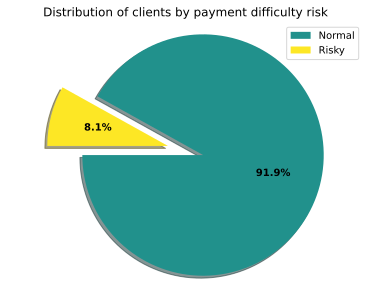

<IPython.core.display.Javascript object>

In [20]:
labels = "Normal", "Risky"
df_size = df_application_train["TARGET"].value_counts()
colors = plt.cm.viridis(np.linspace(0.5, 1, len(labels)))
explode = (0.3, 0)

plt.pie(
    df_size,
    explode=explode,
    colors=colors,
    autopct="%1.1f%%",
    shadow=True,
    startangle=180,
    textprops={"weight": "bold"},
)
plt.legend(labels, loc="best")
plt.axis("equal")
plt.title("Distribution of clients by payment difficulty risk")

plt.show()

In [21]:
duplicates_df = df_application_train.duplicated()
duplicates_df_count = duplicates_df.sum()
duplicates_df_count

0

<IPython.core.display.Javascript object>

Dealing with imbalanced dataset without any duplicates.

In [22]:
columns_remove = [
    "OBS_30_CNT_SOCIAL_CIRCLE",
    "DEF_30_CNT_SOCIAL_CIRCLE",
    "OBS_60_CNT_SOCIAL_CIRCLE",
    "DEF_60_CNT_SOCIAL_CIRCLE",
    "DAYS_LAST_PHONE_CHANGE",
    "FLAG_DOCUMENT_2",
    "FLAG_DOCUMENT_3",
    "FLAG_DOCUMENT_4",
    "FLAG_DOCUMENT_5",
    "FLAG_DOCUMENT_6",
    "FLAG_DOCUMENT_7",
    "FLAG_DOCUMENT_8",
    "FLAG_DOCUMENT_9",
    "FLAG_DOCUMENT_10",
    "FLAG_DOCUMENT_11",
    "FLAG_DOCUMENT_12",
    "FLAG_DOCUMENT_13",
    "FLAG_DOCUMENT_14",
    "FLAG_DOCUMENT_15",
    "FLAG_DOCUMENT_16",
    "FLAG_DOCUMENT_17",
    "FLAG_DOCUMENT_18",
    "FLAG_DOCUMENT_19",
    "FLAG_DOCUMENT_20",
    "FLAG_DOCUMENT_21",
    "AMT_REQ_CREDIT_BUREAU_HOUR",
    "AMT_REQ_CREDIT_BUREAU_DAY",
    "AMT_REQ_CREDIT_BUREAU_WEEK",
    "AMT_REQ_CREDIT_BUREAU_MON",
    "AMT_REQ_CREDIT_BUREAU_QRT",
    "AMT_REQ_CREDIT_BUREAU_YEAR",
    "EXT_SOURCE_1",
    "EXT_SOURCE_2",
    "EXT_SOURCE_3",
    "APARTMENTS_AVG",
    "BASEMENTAREA_AVG",
    "YEARS_BEGINEXPLUATATION_AVG",
    "YEARS_BUILD_AVG",
    "COMMONAREA_AVG",
    "ELEVATORS_AVG",
    "ENTRANCES_AVG",
    "FLOORSMAX_AVG",
    "FLOORSMIN_AVG",
    "LANDAREA_AVG",
    "LIVINGAPARTMENTS_AVG",
    "LIVINGAREA_AVG",
    "NONLIVINGAPARTMENTS_AVG",
    "NONLIVINGAREA_AVG",
    "APARTMENTS_MODE",
    "BASEMENTAREA_MODE",
    "YEARS_BEGINEXPLUATATION_MODE",
    "YEARS_BUILD_MODE",
    "COMMONAREA_MODE",
    "ELEVATORS_MODE",
    "ENTRANCES_MODE",
    "FLOORSMAX_MODE",
    "FLOORSMIN_MODE",
    "LANDAREA_MODE",
    "LIVINGAPARTMENTS_MODE",
    "LIVINGAREA_MODE",
    "NONLIVINGAPARTMENTS_MODE",
    "NONLIVINGAREA_MODE",
    "APARTMENTS_MEDI",
    "BASEMENTAREA_MEDI",
    "YEARS_BEGINEXPLUATATION_MEDI",
    "YEARS_BUILD_MEDI",
    "COMMONAREA_MEDI",
    "ELEVATORS_MEDI",
    "ENTRANCES_MEDI",
    "FLOORSMAX_MEDI",
    "FLOORSMIN_MEDI",
    "LANDAREA_MEDI",
    "LIVINGAPARTMENTS_MEDI",
    "LIVINGAREA_MEDI",
    "NONLIVINGAPARTMENTS_MEDI",
    "NONLIVINGAREA_MEDI",
    "FONDKAPREMONT_MODE",
    "HOUSETYPE_MODE",
    "TOTALAREA_MODE",
    "WALLSMATERIAL_MODE",
    "EMERGENCYSTATE_MODE",
]

df_application_train = df_application_train.drop(columns=columns_remove, axis=1)

<IPython.core.display.Javascript object>

In [23]:
pd.set_option("display.max_columns", None)

df_application_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

<IPython.core.display.Javascript object>

In [24]:
pd.set_option("display.max_rows", None)

df = df_application_train

num_of_rows = len(df)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / num_of_rows) * 100

missing_percentage_df = pd.DataFrame(
    {
        "Missing values (count)": missing_values,
        "Missing values (%)": missing_percentage,
    }
).sort_values("Missing values (%)", ascending=False)

missing_percentage_df = missing_percentage_df[
    missing_percentage_df["Missing values (%)"] > 0
]

missing_percentage_df

Missing values (count)  Missing values (%)
OWN_CAR_AGE                      202929           65.990810
OCCUPATION_TYPE                   96391           31.345545
NAME_TYPE_SUITE                    1292            0.420148
AMT_GOODS_PRICE                     278            0.090403
AMT_ANNUITY                          12            0.003902
CNT_FAM_MEMBERS                       2            0.000650

<IPython.core.display.Javascript object>

## Loan type

In [25]:
unique = pd.unique(df_application_train["NAME_CONTRACT_TYPE"])
unique

array(['Cash loans', 'Revolving loans'], dtype=object)

<IPython.core.display.Javascript object>

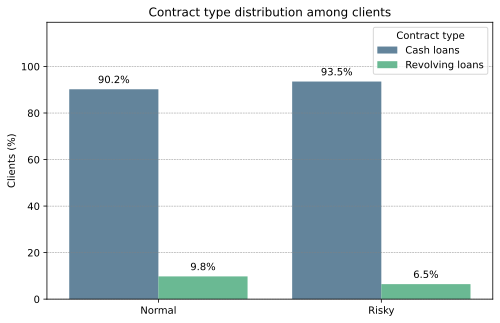

<IPython.core.display.Javascript object>

In [26]:
feature = "NAME_CONTRACT_TYPE"
df_name = "df_application_train"
class_name = "TARGET"
feature_name_display = "Contract type"

df_name = (
    df.groupby(class_name)[feature]
    .value_counts(normalize=True)
    .mul(100)
    .reset_index(name="Percentage")
)

df_name[class_name] = df_name[class_name].map({0: "Normal", 1: "Risky"})

plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x=class_name,
    y="Percentage",
    hue=feature,
    data=df_name,
    palette="viridis",
    alpha=0.8,
)

plt.ylim(0, 119)
plt.title(f"{feature_name_display} distribution among clients")
plt.ylabel("Clients (%)")
plt.xlabel("")
plt.legend(title=feature_name_display, loc="upper right")

plt.grid(True, linestyle="--", linewidth=0.5, color="grey", axis="y")

for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.1f}%",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 9),
        textcoords="offset points",
    )

plt.show()

## Gender

In [27]:
unique = pd.unique(df_application_train["CODE_GENDER"])
unique

array(['M', 'F', 'XNA'], dtype=object)

<IPython.core.display.Javascript object>

In [28]:
values = df_application_train["CODE_GENDER"].value_counts()
print(values)

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


<IPython.core.display.Javascript object>

In [29]:
df["CODE_GENDER"].replace("XNA", "Unknown/Non-binary", inplace=True)

<IPython.core.display.Javascript object>

In [30]:
unique = pd.unique(df_application_train["CODE_GENDER"])
unique

array(['M', 'F', 'Unknown/Non-binary'], dtype=object)

<IPython.core.display.Javascript object>

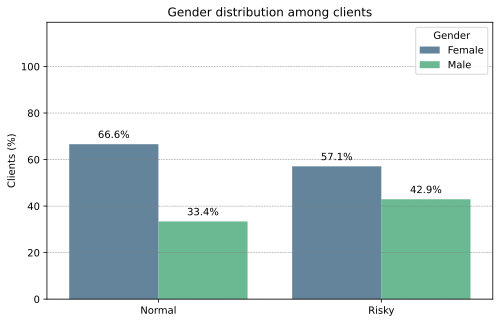

<IPython.core.display.Javascript object>

In [31]:
feature = "CODE_GENDER"
df_name = "df_application_train"
class_name = "TARGET"
feature_name_display = "Gender"

df_name = (
    df.groupby(class_name)[feature]
    .value_counts(normalize=True)
    .mul(100)
    .reset_index(name="Percentage")
)

df_name[feature] = df_name[feature].map({"F": "Female", "M": "Male"})
df_name[class_name] = df_name[class_name].map({0: "Normal", 1: "Risky"})

plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x=class_name,
    y="Percentage",
    hue=feature,
    data=df_name,
    palette="viridis",
    alpha=0.8,
)

plt.ylim(0, 119)
plt.title(f"{feature_name_display} distribution among clients")
plt.ylabel("Clients (%)")
plt.xlabel("")
plt.legend(title=feature_name_display, loc="upper right")

plt.grid(True, linestyle="--", linewidth=0.5, color="grey", axis="y")

for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.1f}%",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 9),
        textcoords="offset points",
    )

plt.show()

*4 Unknown/Non-binary clients landed among normal grade loan applications.

# Car ownership

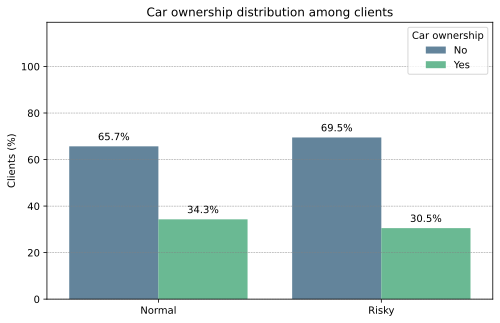

<IPython.core.display.Javascript object>

In [32]:
feature = "FLAG_OWN_CAR"
df_name = "df_application_train"
class_name = "TARGET"
feature_name_display = "Car ownership"

df_name = (
    df.groupby(class_name)[feature]
    .value_counts(normalize=True)
    .mul(100)
    .reset_index(name="Percentage")
)

df_name[feature] = df_name[feature].map({"N": "No", "Y": "Yes"})
df_name[class_name] = df_name[class_name].map({0: "Normal", 1: "Risky"})

plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x=class_name,
    y="Percentage",
    hue=feature,
    data=df_name,
    palette="viridis",
    alpha=0.8,
)

plt.ylim(0, 119)
plt.title(f"{feature_name_display} distribution among clients")
plt.ylabel("Clients (%)")
plt.xlabel("")
plt.legend(title=feature_name_display, loc="upper right")

# Grid lines
plt.grid(True, linestyle="--", linewidth=0.5, color="grey", axis="y")

# Percentage
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.1f}%",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 9),
        textcoords="offset points",
    )

plt.show()

## Realty ownership

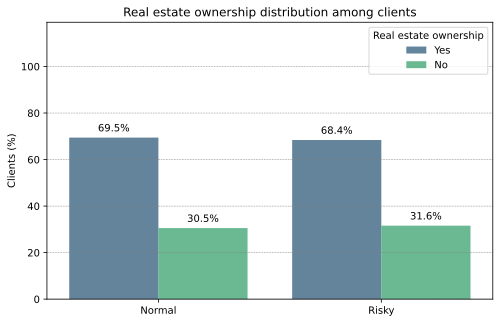

<IPython.core.display.Javascript object>

In [33]:
feature = "FLAG_OWN_REALTY"
df_name = "df_application_train"
class_name = "TARGET"
feature_name_display = "Real estate ownership"

df_name = (
    df.groupby(class_name)[feature]
    .value_counts(normalize=True)
    .mul(100)
    .reset_index(name="Percentage")
)

df_name[feature] = df_name[feature].map({"N": "No", "Y": "Yes"})
df_name[class_name] = df_name[class_name].map({0: "Normal", 1: "Risky"})

plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x=class_name,
    y="Percentage",
    hue=feature,
    data=df_name,
    palette="viridis",
    alpha=0.8,
)

plt.ylim(0, 119)
plt.title(f"{feature_name_display} distribution among clients")
plt.ylabel("Clients (%)")
plt.xlabel("")
plt.legend(title=feature_name_display, loc="upper right")

# Grid lines
plt.grid(True, linestyle="--", linewidth=0.5, color="grey", axis="y")

# Percentage
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.1f}%",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 9),
        textcoords="offset points",
    )

plt.show()

## Children of the clients

In [34]:
unique = pd.unique(df_application_train["CNT_CHILDREN"])
unique

array([ 0,  1,  2,  3,  4,  7,  5,  6,  8,  9, 11, 12, 10, 19, 14])

<IPython.core.display.Javascript object>

In [35]:
df_application_train["CNT_CHILDREN"] = df_application_train["CNT_CHILDREN"].astype(int)

<IPython.core.display.Javascript object>

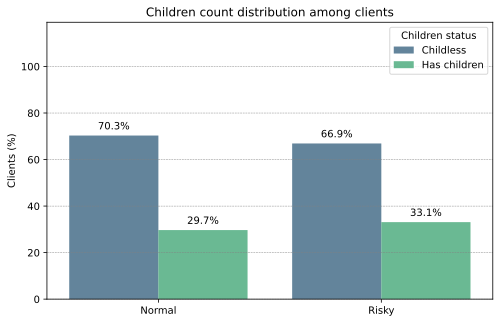

<IPython.core.display.Javascript object>

In [36]:
feature = "CNT_CHILDREN"
df_name = "df_application_train"
class_name = "TARGET"
feature_name_display = "Car ownership"

temp_df = df_application_train[[class_name, 'CNT_CHILDREN']].copy()

temp_df['CNT_CHILDREN'] = temp_df['CNT_CHILDREN'].apply(lambda x: 'Has children' if x > 0 else 'Childless')

temp_df[class_name] = temp_df[class_name].map({0: "Normal", 1: "Risky"})

df_name = (
    temp_df.groupby(class_name)['CNT_CHILDREN']
    .value_counts(normalize=True)
    .mul(100)
    .reset_index(name="Percentage")
)

plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x=class_name,
    y="Percentage",
    hue='CNT_CHILDREN',
    data=df_name,
    palette="viridis",
    alpha=0.8,
)

plt.ylim(0, 119)
plt.title("Children count distribution among clients")
plt.ylabel("Clients (%)")
plt.xlabel("")
plt.legend(title="Children status", loc="upper right")

plt.grid(True, linestyle="--", linewidth=0.5, color="grey", axis="y")

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):  # Check for NaN in heigth
        ax.annotate(
            f"{height:.1f}%",
            (p.get_x() + p.get_width() / 2.0, height),
            ha="center",
            va="center",
            xytext=(0, 9),
            textcoords="offset points",
        )

plt.show()


In [37]:
average_children_per_class = df_application_train.groupby(class_name)[
    "CNT_CHILDREN"
].mean()
average_children_per_class

TARGET
0    0.412946
1    0.463807
Name: CNT_CHILDREN, dtype: float64

<IPython.core.display.Javascript object>

## Anual income

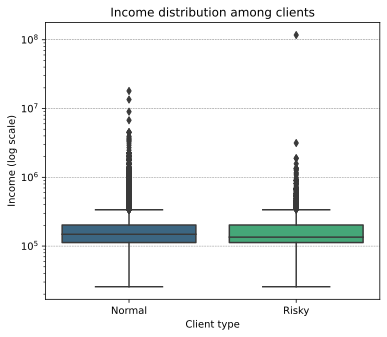

<IPython.core.display.Javascript object>

In [38]:
feature = "AMT_INCOME_TOTAL"
class_name = "TARGET"
feature_name_display = "Income"

temp_df = df_application_train[[class_name, feature]].copy()

temp_df[class_name] = temp_df[class_name].map({0: "Normal", 1: "Risky"})

plt.figure(figsize=(6, 5))
sns.boxplot(
    x=class_name,
    y=feature,
    data=temp_df,
    order=["Normal", "Risky"],
    palette="viridis",
    showfliers=True,  # False to avoid showing outliers
)

plt.grid(True, linestyle="--", linewidth=0.5, color="grey", axis="y")
plt.yscale("log")
plt.title(f"{feature_name_display} distribution among clients")
plt.xlabel("Client type")
plt.ylabel("Income (log scale)")

plt.show()

In [39]:
average_income_per_class = (
    df_application_train.groupby(class_name)["AMT_INCOME_TOTAL"].mean().round(0)
)
average_income_per_class

TARGET
0    169078.0
1    165612.0
Name: AMT_INCOME_TOTAL, dtype: float64

<IPython.core.display.Javascript object>

In [40]:
median_income_per_class = df_application_train.groupby(class_name)[
    "AMT_INCOME_TOTAL"
].median()
median_income_per_class

TARGET
0    148500.0
1    135000.0
Name: AMT_INCOME_TOTAL, dtype: float64

<IPython.core.display.Javascript object>

In [41]:
out_income = 100000000
client_info = df_application_train[
    df_application_train["AMT_INCOME_TOTAL"] > out_income
]
client_info

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
12840      114967       1         Cash loans           F            N   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
12840               Y             1       117000000.0    562491.0   

       AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
12840      26194.5         454500.0   Unaccompanied          Working   

                 NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
12840  Secondary / secondary special            Married  House / apartment   

       REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
12840                    0.010643      -12615           -922   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
12840            -6762.0            -3643          NaN           1   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
12840               1                0                 1           0   

       FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
12840           0        Laborers              3.0                     2   

       REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
12840                            2                    TUESDAY   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
12840                       14                           0   

       REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
12840                           0                            0   

       REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
12840                       0                       0   

       LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  
12840                        0  Business Entity Type 3

<IPython.core.display.Javascript object>

### Statistical tests

In [42]:
set_risky = df_application_train[df_application_train["TARGET"] == 1][
    "AMT_INCOME_TOTAL"
]
set_normal = df_application_train[df_application_train["TARGET"] == 0][
    "AMT_INCOME_TOTAL"
]

stat, p_value = levene(set_risky, set_normal)

print(f"Levene's test score: {stat} and p-value: {p_value}")

set_alpha = 0.05
if p_value < set_alpha:
    print("The assumption of equal variances is NOT valid.")
else:
    print("The assumption of equal variances is valid.")

Levene's test score: 2.4337415012016463 and p-value: 0.1187501932331039
The assumption of equal variances is valid.


<IPython.core.display.Javascript object>

The Levene test tests the null hypothesis that all input samples are from populations with equal variances (from documentation). This is an important consideration when performing t-test.

The null hypothesis can be formulated as follows:
**H0**: The mean income of clients who have problems repaying is equal to that of clients who repay normally.
**H1**: The mean incomes are different for problematic and normal clients.

In [43]:
set_risky = df_application_train[df_application_train["TARGET"] == 1][
    "AMT_INCOME_TOTAL"
]
set_normal = df_application_train[df_application_train["TARGET"] == 0][
    "AMT_INCOME_TOTAL"
]

t_stat, p_value = stats.ttest_ind(set_risky, set_normal, equal_var=True)

print(f"T-statistic: {t_stat} and p-value: {p_value}")

set_alpha = 0.05
if p_value < set_alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

T-statistic: -2.2081011084695983 and p-value: 0.027237960879677118
Reject the null hypothesis


<IPython.core.display.Javascript object>

Turns out that there are statistically significant differences between the two groups of clients regarding their annual incomes.

In [44]:
threshold = [0, 20000, 40000, 100000, 400000, 1000000, 10000000, np.inf]
label = [
    "Low income",
    "Lower middle income",
    "Middle income",
    "Upper middle income",
    "High income",
    "Very high income",
    "Ultra high income",
]

df_application_train["Income_Class"] = pd.cut(
    df_application_train["AMT_INCOME_TOTAL"], bins=threshold, labels=label, right=False
)

df_application_train[["AMT_INCOME_TOTAL", "Income_Class"]].head()

AMT_INCOME_TOTAL         Income_Class
0          202500.0  Upper middle income
1          270000.0  Upper middle income
2           67500.0        Middle income
3          135000.0  Upper middle income
4          121500.0  Upper middle income

<IPython.core.display.Javascript object>

Binning can be helpful to reviel clear  picture about financial situation of people, who borrow money and also it assigns the outliers to a certain cathegory.

Binning classification is made assuming the dataset represents mostly US users and considering the follwoing data: money.usnews.com/money/personal-finance/family-finance/articles/where-do-i-fall-in-the-american-economic-class-system

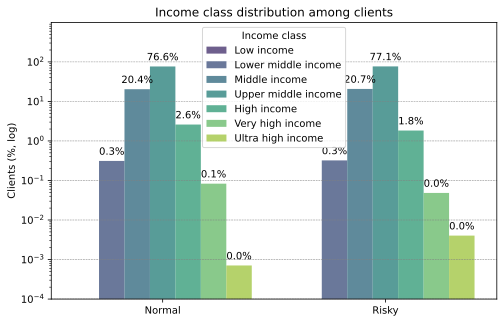

<IPython.core.display.Javascript object>

In [45]:
feature = "Income_Class"
df_name = "df_application_train"
class_name = "TARGET"
feature_name_display = "Income class"

df_name = (
    df.groupby(class_name)[feature]
    .value_counts(normalize=True)
    .mul(100)
    .reset_index(name="Percentage")
)

# df_name = df_name[df_name["Percentage"] > 0.1]

df_name[class_name] = df_name[class_name].map({0: "Normal", 1: "Risky"})

plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x=class_name,
    y="Percentage",
    hue=feature,
    data=df_name,
    palette="viridis",
    alpha=0.8,
)

plt.yscale("log")
plt.ylim(0.0001, 999)
plt.title(f"{feature_name_display} distribution among clients")
plt.ylabel("Clients (%, log)")
plt.xlabel("")
plt.legend(title=feature_name_display, loc="upper center")

plt.grid(True, linestyle="--", linewidth=0.5, color="grey", axis="y")

for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.1f}%",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 9),
        textcoords="offset points",
    )

plt.show()

In [46]:
low_income = 20000
client_info = df_application_train[
    df_application_train["AMT_INCOME_TOTAL"] <= low_income
]
client_info

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, Income_Class]
Index: []

<IPython.core.display.Javascript object>

There are no people in either risky or normal group that has low income and most people (around 77%) in both groups are from middle income cathegory.

## Credit amount

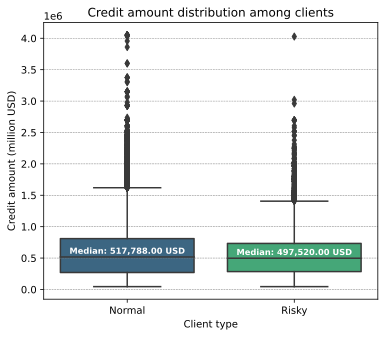

<IPython.core.display.Javascript object>

In [47]:
feature = "AMT_CREDIT"
class_name = "TARGET"
feature_name_display = "Credit amount"

temp_df = df_application_train[[class_name, feature]].copy()
temp_df[class_name] = temp_df[class_name].map({0: "Normal", 1: "Risky"})

plt.figure(figsize=(6, 5))
ax = sns.boxplot(
    x=class_name,
    y=feature,
    data=temp_df,
    order=["Normal", "Risky"],
    palette="viridis",
    showfliers=True,
)

plt.grid(True, linestyle="--", linewidth=0.5, color="grey", axis="y")
plt.title(f"{feature_name_display} distribution among clients")
plt.xlabel("Client type")
plt.ylabel("Credit amount (million USD)")

medians = temp_df.groupby([class_name])[feature].median()
vertical_offset = temp_df[feature].median() * 0.1
for xtick in ax.get_xticks():
    ax.text(
        xtick,
        medians[xtick] + vertical_offset,
        f"Median: {medians[xtick]:,.2f} USD",
        horizontalalignment="center",
        size="small",
        color="w",
        weight="semibold",
    )

plt.savefig("credit_distribution.svg", format="svg", bbox_inches="tight")

plt.show()

In [48]:
set_risky = df_application_train[df_application_train["TARGET"] == 1]["AMT_CREDIT"]
set_normal = df_application_train[df_application_train["TARGET"] == 0]["AMT_CREDIT"]

stat, p_value = levene(set_risky, set_normal)

print(f"Levene's test score: {stat} and p-value: {p_value}")

sat_alpha = 0.05
if p_value < set_alpha:
    print("The assumption of equal variances is NOT valid.")
else:
    print("The assumption of equal variances is valid.")

Levene's test score: 837.7153814091839 and p-value: 6.028490830637442e-184
The assumption of equal variances is NOT valid.


<IPython.core.display.Javascript object>

Variances of two groups are not equal when considering amount of money borrowed. Let's define null hypotheses in a similar fashion. **H0**: The mean amount borroved for clients who have problems repaying is equal to that of clients who repay normally. **H1**: The mean amount borroved are different for problematic and normal clients.

In [49]:
set_risky = df_application_train[df_application_train["TARGET"] == 1]["AMT_CREDIT"]
set_normal = df_application_train[df_application_train["TARGET"] == 0]["AMT_CREDIT"]

t_stat, p_value = stats.ttest_ind(set_risky, set_normal, equal_var=False)

print(f"T-statistic: {t_stat} and p-value: {p_value}")

set_alpha = 0.05
if p_value < set_alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

T-statistic: -19.273175042266935 and p-value: 2.72191069717545e-82
Reject the null hypothesis


<IPython.core.display.Javascript object>

The mean amount borroved are different for problematic and normal clients.

## Types of workers

In [50]:
unique = pd.unique(df_application_train["NAME_INCOME_TYPE"])
unique

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

<IPython.core.display.Javascript object>

In [51]:
df_application_train["DTI (%)"] = (
    df_application_train["AMT_ANNUITY"] / df_application_train["AMT_INCOME_TOTAL"]
) * 100
df_application_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

<IPython.core.display.Javascript object>

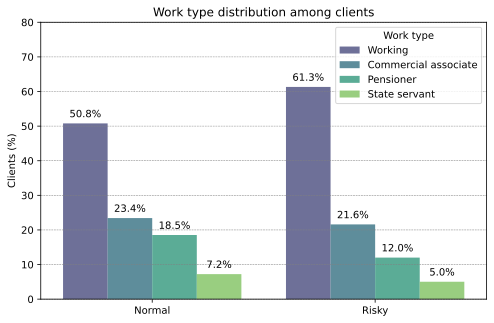

<IPython.core.display.Javascript object>

In [52]:
feature = "NAME_INCOME_TYPE"
df_name = "df_application_train"
class_name = "TARGET"
feature_name_display = "Work type"

df_name = (
    df.groupby(class_name)[feature]
    .value_counts(normalize=True)
    .mul(100)
    .reset_index(name="Percentage")
)

df_name = df_name[df_name["Percentage"] > 0.1]

df_name[class_name] = df_name[class_name].map({0: "Normal", 1: "Risky"})

plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x=class_name,
    y="Percentage",
    hue=feature,
    data=df_name,
    palette="viridis",
    alpha=0.8,
)

plt.ylim(0, 80)
# plt.yscale("log")
plt.title(f"{feature_name_display} distribution among clients")
plt.ylabel("Clients (%)")
plt.xlabel("")
plt.legend(title=feature_name_display, loc="upper right")

plt.grid(True, linestyle="--", linewidth=0.5, color="grey", axis="y")

for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.1f}%",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 9),
        textcoords="offset points",
    )

plt.show()

## Age

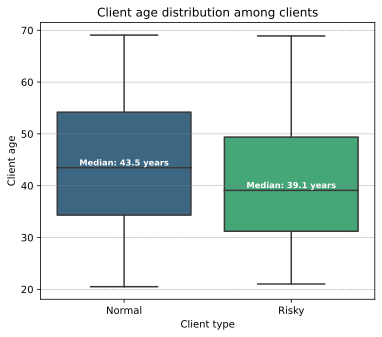

<IPython.core.display.Javascript object>

In [53]:
feature = "DAYS_BIRTH"
class_name = "TARGET"
feature_name_display = "Client age"

temp_df = df_application_train[[class_name, feature]].copy()
temp_df[feature] = temp_df[feature] / -365.25
temp_df[class_name] = temp_df[class_name].map({0: "Normal", 1: "Risky"})

plt.figure(figsize=(6, 5))
ax = sns.boxplot(
    x=class_name,
    y=feature,
    data=temp_df,
    order=["Normal", "Risky"],
    palette="viridis",
    showfliers=True,
)

plt.grid(True, linestyle="--", linewidth=0.5, color="grey", axis="y")
plt.title(f"{feature_name_display} distribution among clients")
plt.xlabel("Client type")
plt.ylabel(f"{feature_name_display}")

medians = temp_df.groupby([class_name])[feature].median()
vertical_offset = temp_df[feature].median() * 0.01
for xtick in ax.get_xticks():
    ax.text(
        xtick,
        medians[xtick] + vertical_offset,
        f"Median: {medians[xtick]:,.1f} years",
        horizontalalignment="center",
        size="small",
        color="w",
        weight="semibold",
    )

plt.show()

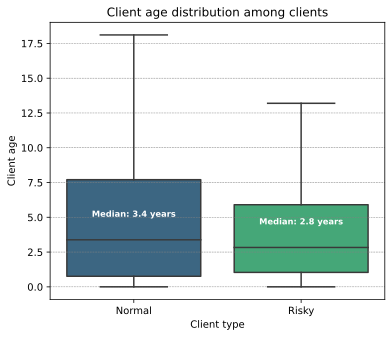

<IPython.core.display.Javascript object>

In [54]:
feature = "DAYS_EMPLOYED"
class_name = "TARGET"
feature_name_display = "Client age"

temp_df = df_application_train[[class_name, feature]].copy()
temp_df[feature] = temp_df[feature] / -365.25
temp_df[class_name] = temp_df[class_name].map({0: "Normal", 1: "Risky"})

plt.figure(figsize=(6, 5))
ax = sns.boxplot(
    x=class_name,
    y=feature,
    data=temp_df,
    order=["Normal", "Risky"],
    palette="viridis",
    showfliers=False,
)

plt.grid(True, linestyle="--", linewidth=0.5, color="grey", axis="y")
plt.title(f"{feature_name_display} distribution among clients")
plt.xlabel("Client type")
plt.ylabel(f"{feature_name_display}")

medians = temp_df.groupby([class_name])[feature].median()
vertical_offset = temp_df[feature].median() * 0.5
for xtick in ax.get_xticks():
    ax.text(
        xtick,
        medians[xtick] + vertical_offset,
        f"Median: {medians[xtick]:,.1f} years",
        horizontalalignment="center",
        size="small",
        color="w",
        weight="semibold",
    )

plt.show()

In [55]:
out_income = 10000000
client_info = df[df["AMT_INCOME_TOTAL"] > out_income]
client_info

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
12840       114967       1         Cash loans           F            N   
203693      336147       0         Cash loans           M            Y   
246858      385674       0         Cash loans           M            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
12840                Y             1       117000000.0    562491.0   
203693               Y             2        18000090.0    675000.0   
246858               Y             0        13500000.0   1400503.5   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
12840       26194.5         454500.0   Unaccompanied               Working   
203693      69295.5         675000.0   Unaccompanied  Commercial associate   
246858     130945.5        1368000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
12840   Secondary / secondary special            Married  House / apartment   
203693  Secondary / secondary special            Married  House / apartment   
246858               Higher education            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
12840                     0.010643      -12615           -922   
203693                    0.030755      -15704          -4961   
246858                    0.030755      -13551           -280   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
12840             -6762.0            -3643          NaN           1   
203693            -3338.0            -4728          7.0           1   
246858            -3953.0            -4972         10.0           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
12840                1                0                 1           0   
203693               1                0                 1           0   
246858               1                1                 1           0   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
12840            0        Laborers              3.0                     2   
203693           0             NaN              4.0                     2   
246858           0             NaN              2.0                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
12840                             2                    TUESDAY   
203693                            2                   THURSDAY   
246858                            2                     SUNDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
12840                        14                           0   
203693                       22                           0   
246858                       12                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
12840                            0                            0   
203693                           0                            0   
246858                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
12840                        0                       0   
203693                       0                       0   
246858                       0                       0   

        LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE       Income_Class  \
12840                         0  Business Entity Type 3  Ultra high income   
203693                        0  Business Entity Type 3  Ultra high income   
246858                        0  Business Entity Type 3  Ultra high income   

         DTI (%)  
12840   0.022388  
203693  0.384973  
246858  0.969967

<IPython.core.display.Javascript object>

## Weekdays of application

In [56]:
unique = pd.unique(df_application_train["WEEKDAY_APPR_PROCESS_START"])
unique

array(['WEDNESDAY', 'MONDAY', 'THURSDAY', 'SUNDAY', 'SATURDAY', 'FRIDAY',
       'TUESDAY'], dtype=object)

<IPython.core.display.Javascript object>

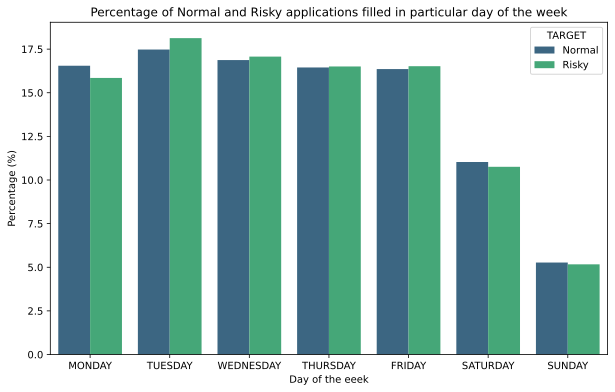

<IPython.core.display.Javascript object>

In [57]:
feature = "WEEKDAY_APPR_PROCESS_START"
class_name = "TARGET"

temp_df = df_application_train[[class_name, feature]].copy()

temp_df["TARGET"] = temp_df["TARGET"].map({0: "Normal", 1: "Risky"})

temp_df["count"] = 1
grouped = temp_df.groupby([class_name, feature]).count().reset_index()
grouped["percentage"] = (
    grouped["count"] / grouped.groupby(class_name)["count"].transform("sum") * 100
)

days_order = [
    "MONDAY",
    "TUESDAY",
    "WEDNESDAY",
    "THURSDAY",
    "FRIDAY",
    "SATURDAY",
    "SUNDAY",
]

plt.figure(figsize=(10, 6))
sns.barplot(
    x=feature,
    y="percentage",
    hue=class_name,
    data=grouped,
    order=days_order,
    palette="viridis",
)

plt.title(
    "Percentage of Normal and Risky applications filled in particular day of the week"
)
plt.xlabel("Day of the eeek")
plt.ylabel("Percentage (%)")

plt.show()

## Dataset preparation

In [58]:
pd.set_option("display.max_columns", None)
df_application_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

<IPython.core.display.Javascript object>

In [59]:
pd.set_option("display.max_rows", None)

num_of_rows = len(df)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / num_of_rows) * 100

missing_percentage_df = pd.DataFrame(
    {
        "Missing values (count)": missing_values,
        "Missing values (%)": missing_percentage,
    }
).sort_values("Missing values (%)", ascending=False)

missing_percentage_df = missing_percentage_df[
    missing_percentage_df["Missing values (%)"] > 0
]

missing_percentage_df

Missing values (count)  Missing values (%)
OWN_CAR_AGE                      202929           65.990810
OCCUPATION_TYPE                   96391           31.345545
NAME_TYPE_SUITE                    1292            0.420148
AMT_GOODS_PRICE                     278            0.090403
AMT_ANNUITY                          12            0.003902
DTI (%)                              12            0.003902
CNT_FAM_MEMBERS                       2            0.000650

<IPython.core.display.Javascript object>

In [60]:
df_application_train["OWN_CAR_AGE_MISSING"] = df_application_train[
    "OWN_CAR_AGE"
].isnull()

crosstab = pd.crosstab(
    df_application_train["FLAG_OWN_CAR"], df_application_train["OWN_CAR_AGE_MISSING"]
)
print(crosstab)

OWN_CAR_AGE_MISSING   False   True 
FLAG_OWN_CAR                       
N                         0  202924
Y                    104582       5


<IPython.core.display.Javascript object>

Most of the car ages are missing for clients who don't have a car. This feature will not be imputed as some ML models can handle missing data.

In [61]:
df["OCCUPATION_TYPE"] = df["OCCUPATION_TYPE"].fillna("Unknown")
df["NAME_TYPE_SUITE"] = df["NAME_TYPE_SUITE"].fillna("Unknown")

<IPython.core.display.Javascript object>

Cathegorical features with missing values was imputed with "Unknown".

In [62]:
df = df.dropna(subset=["AMT_GOODS_PRICE", "DTI (%)", "AMT_ANNUITY", "CNT_FAM_MEMBERS"])

<IPython.core.display.Javascript object>

Small amount of missing numerical values are still left. These will be removed (clients associated with those).

In [63]:
pd.set_option("display.max_rows", None)

num_of_rows = len(df)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / num_of_rows) * 100

missing_percentage_df = pd.DataFrame(
    {
        "Missing values (count)": missing_values,
        "Missing values (%)": missing_percentage,
    }
).sort_values("Missing values (%)", ascending=False)

missing_percentage_df = missing_percentage_df[
    missing_percentage_df["Missing values (%)"] > 0
]

missing_percentage_df

Missing values (count)  Missing values (%)
OWN_CAR_AGE                  202642           65.959684

<IPython.core.display.Javascript object>

In [64]:
pd.set_option("display.max_columns", None)
df_application_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

<IPython.core.display.Javascript object>

In [65]:
N_Y_map = {
    "N": 0,
    "Y": 1,
}

df_application_train["FLAG_OWN_CAR"] = df_application_train["FLAG_OWN_CAR"].map(N_Y_map)
df_application_train["FLAG_OWN_REALTY"] = df_application_train["FLAG_OWN_REALTY"].map(
    N_Y_map
)

<IPython.core.display.Javascript object>

In [66]:
pd.set_option("display.max_columns", None)
df_application_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             1   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2            

<IPython.core.display.Javascript object>

In [67]:
df_application_train.to_csv("main_df_ML.csv", index=False)

<IPython.core.display.Javascript object>

# Conclusions

Financial data of normal and risky clients were analyzed and the reduced dataset was prepared and saved for further preparation, ML modeling and deployment.